<a href="https://colab.research.google.com/github/oguzsozen/GMKA_Oguz_Sozen/blob/main/goruntu_isleme_proje_grup_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
label_names = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

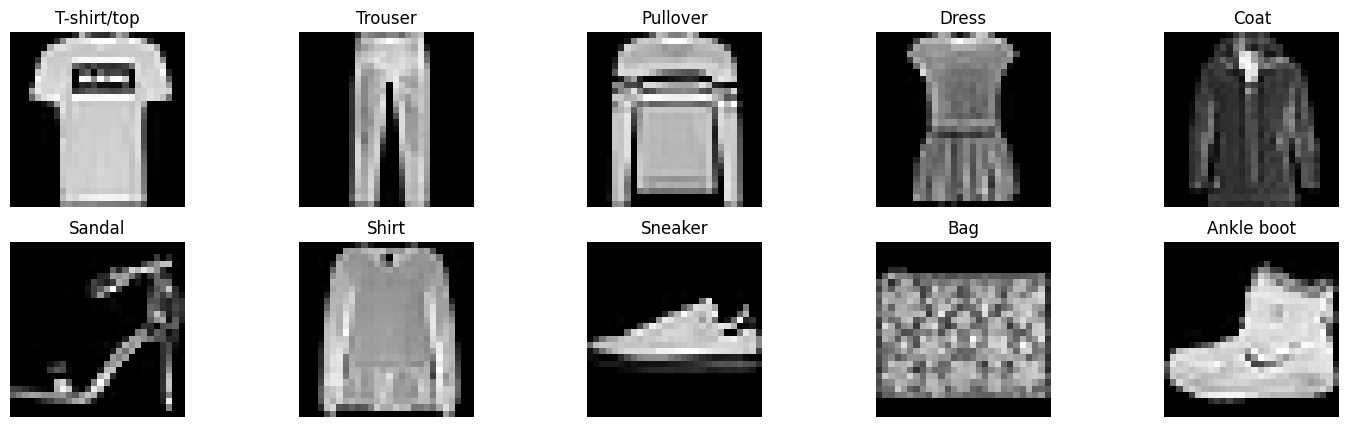

In [ ]:
fig, axs = plt.subplots(2, 5)

fig.set_figheight(5)
fig.set_figwidth(18)

temp_labels = list(range(10))
temp_stack = temp_labels.copy()
index=0

while(temp_stack):
  current_label = y_train[index]

  if current_label in temp_stack:
    axs[temp_labels.index(current_label)//5, temp_labels.index(current_label)%5].imshow(x_train[index], cmap='gray')
    axs[temp_labels.index(current_label)//5, temp_labels.index(current_label)%5].axis('off')
    axs[temp_labels.index(current_label)//5, temp_labels.index(current_label)%5].set_title(label_names[current_label])
    temp_stack.remove(current_label)

  index += 1



# CNN ile MNIST FASHION

In [ ]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') /255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') /255

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
def myModel(i, j, k):
  model = models.Sequential()
  model.add(layers.Conv2D(i, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPool2D((2, 2)))
  model.add(layers.Conv2D(j, (3, 3), activation='relu'))
  model.add(layers.MaxPool2D((2, 2)))
  model.add(layers.Conv2D(k, (3, 3), activation='relu'))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [ ]:
def trainModel(i, j, k):
  model=myModel(i, j, k)

  model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

  history = model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=64,
          validation_split=0.15)

  return history

In [ ]:
histories = {}
keyNameCreator = lambda i, j, k : str(i) + " " + str(j) + " " + str(k)
i = 16

while(i <= 64):
  j = i

  while(j <= 64):
    if i*2 < j:
      break
    k = j

    while(k <= 64):
      if j*2 < k:
        break

      current_model_name = keyNameCreator(i, j, k)

      print("\n-------------------------------------------------\n")
      print("Model parameters: " + current_model_name + "\n")

      histories[current_model_name] = trainModel(i, j, k)
      k *= 2
    j *= 2
  i *= 2


-------------------------------------------------

Model parameters: 16 16 16

Epoch 1/10
797/797 [==============================] - 28s 34ms/step - loss: 0.7229 - accuracy: 0.7354 - val_loss: 0.5371 - val_accuracy: 0.8094
Epoch 2/10
797/797 [==============================] - 27s 34ms/step - loss: 0.4684 - accuracy: 0.8270 - val_loss: 0.4225 - val_accuracy: 0.8493
Epoch 3/10
797/797 [==============================] - 27s 34ms/step - loss: 0.3948 - accuracy: 0.8582 - val_loss: 0.3790 - val_accuracy: 0.8629
Epoch 4/10
797/797 [==============================] - 27s 33ms/step - loss: 0.3506 - accuracy: 0.8742 - val_loss: 0.3579 - val_accuracy: 0.8694
Epoch 5/10
797/797 [==============================] - 27s 33ms/step - loss: 0.3245 - accuracy: 0.8829 - val_loss: 0.3311 - val_accuracy: 0.8809
Epoch 6/10
797/797 [==============================] - 26s 33ms/step - loss: 0.3054 - accuracy: 0.8890 - val_loss: 0.3146 - val_accuracy: 0.8832
Epoch 7/10
797/797 [==============================] - 27

In [ ]:
def showAccAndLoss(arg_history, model_name):

    acc = arg_history.history['accuracy']
    val_acc = arg_history.history['val_accuracy']
    loss = arg_history.history['loss']
    val_loss = arg_history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(2, 2)

    fig.suptitle('Model Parameters: ' + model_name, fontsize=20)
    fig.set_figheight(8)
    fig.set_figwidth(10)

    axs[0][0].plot(epochs, acc)
    axs[0][0].set_title('Eğitim Başarımı')

    axs[0][1].plot(epochs, val_acc)
    axs[0][1].set_title('Doğrulama Başarımı')

    axs[1][0].plot(epochs, loss)
    axs[1][0].set_title('Eğitim Kaybı')

    axs[1][1].plot(epochs, val_loss)
    axs[1][1].set_title('Doğrulama Kaybı')

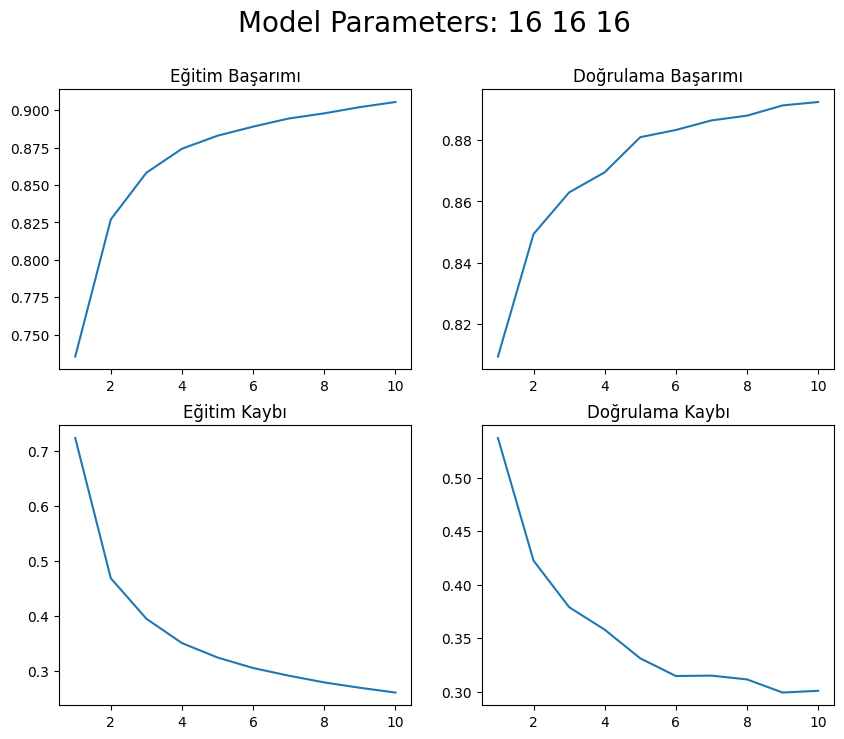

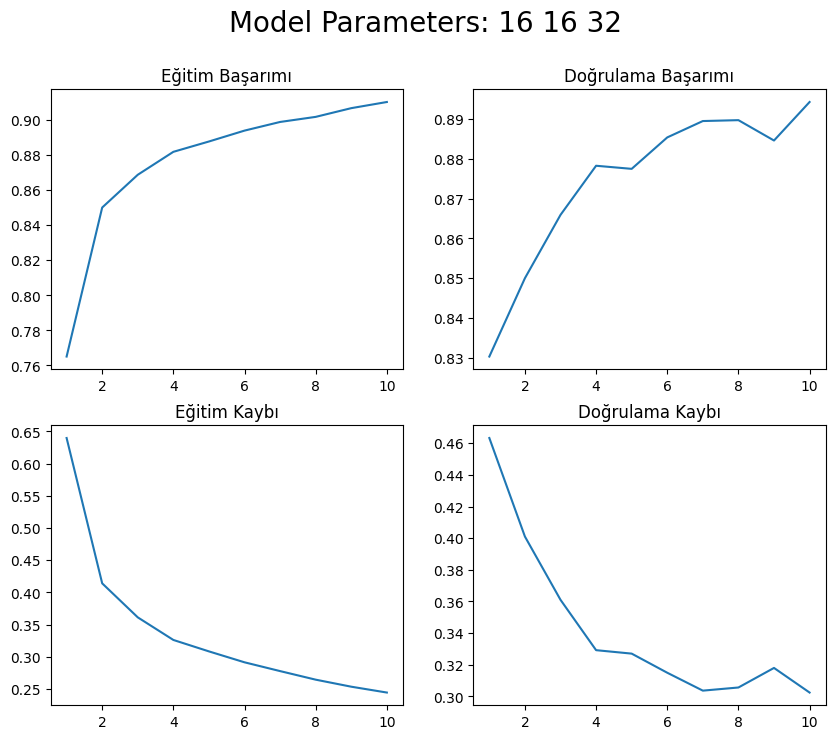

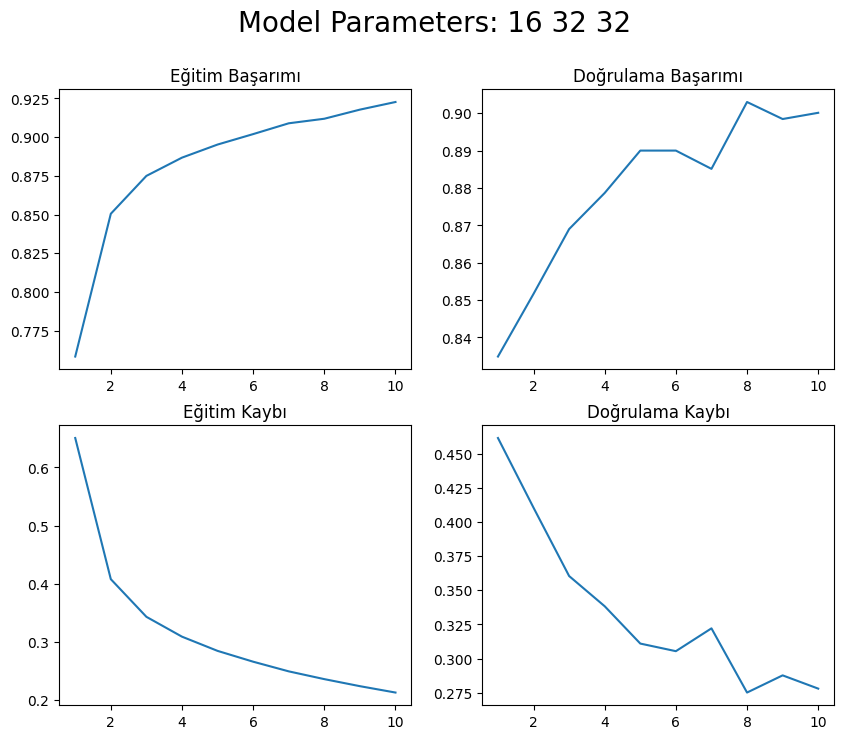

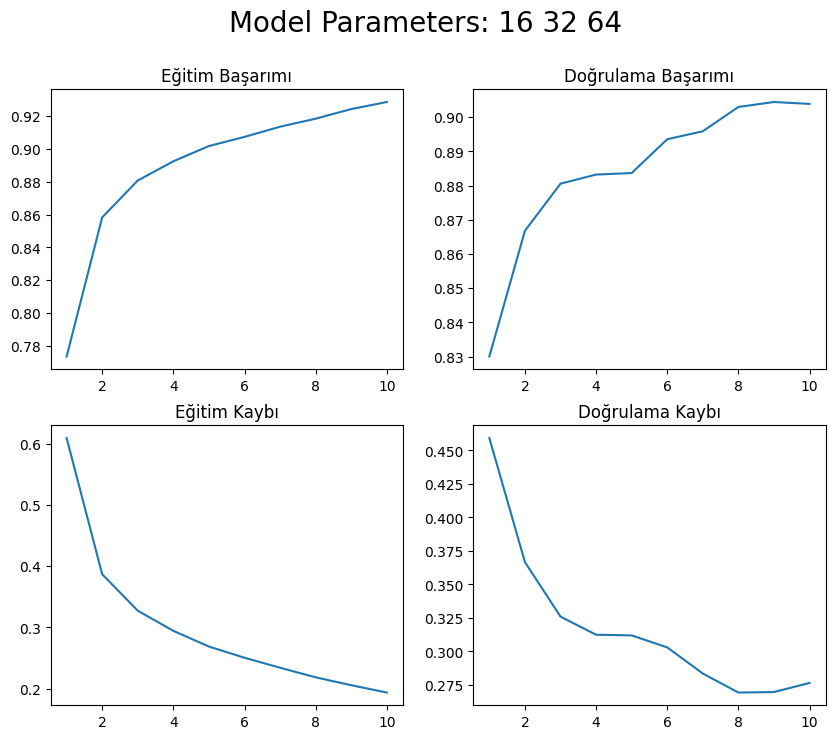

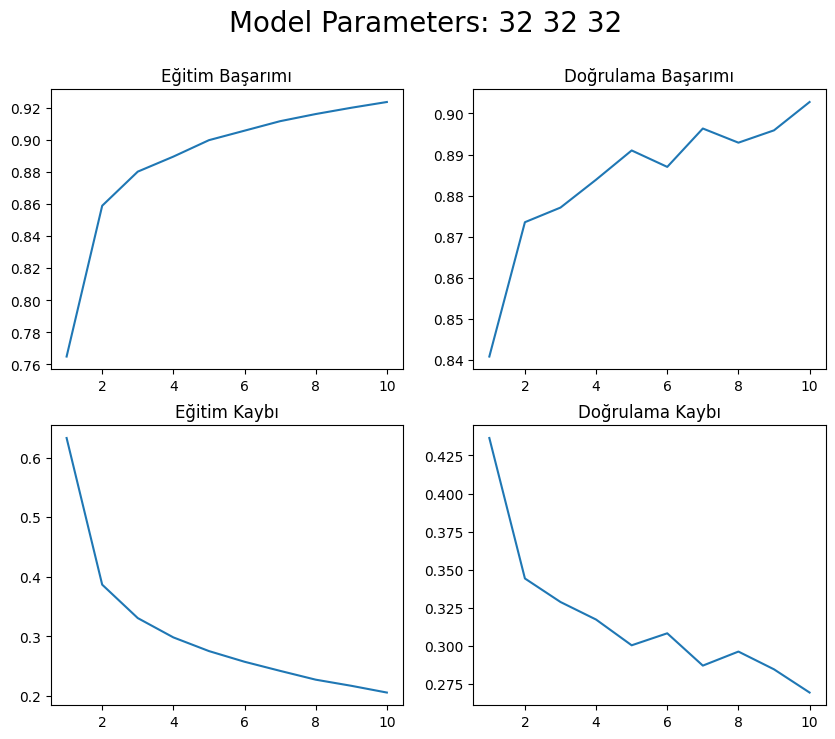

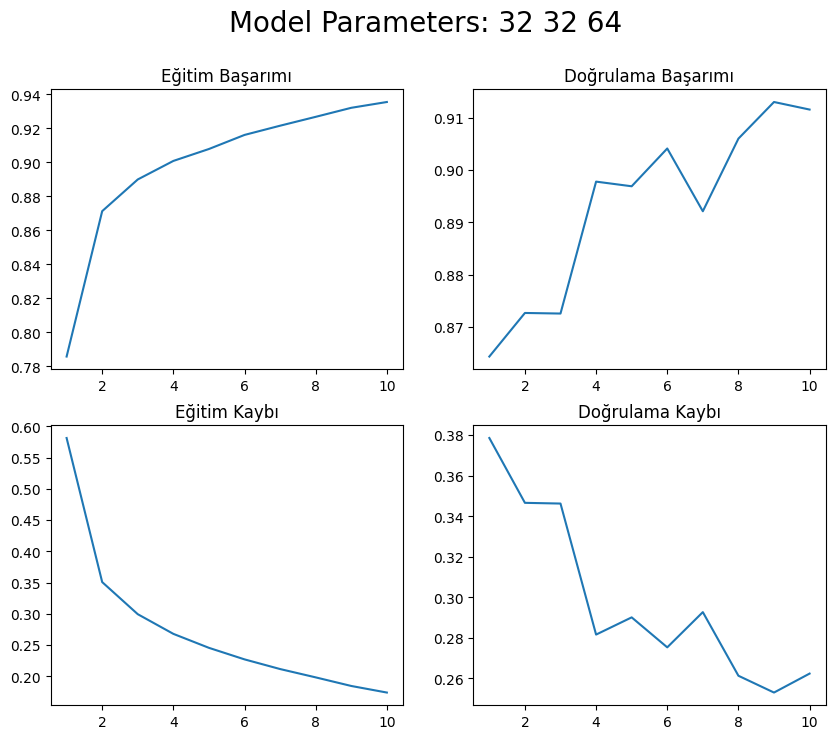

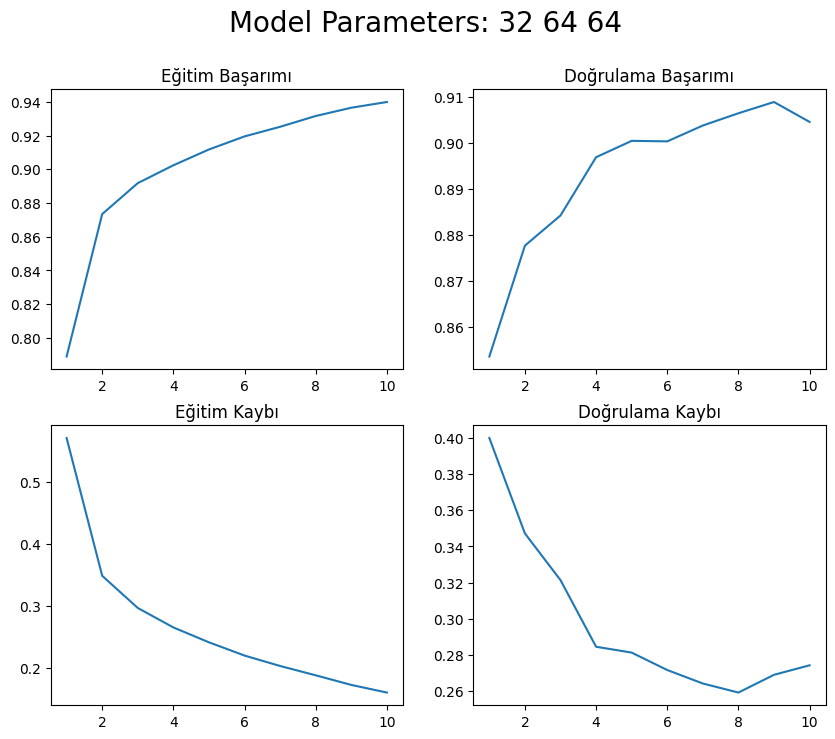

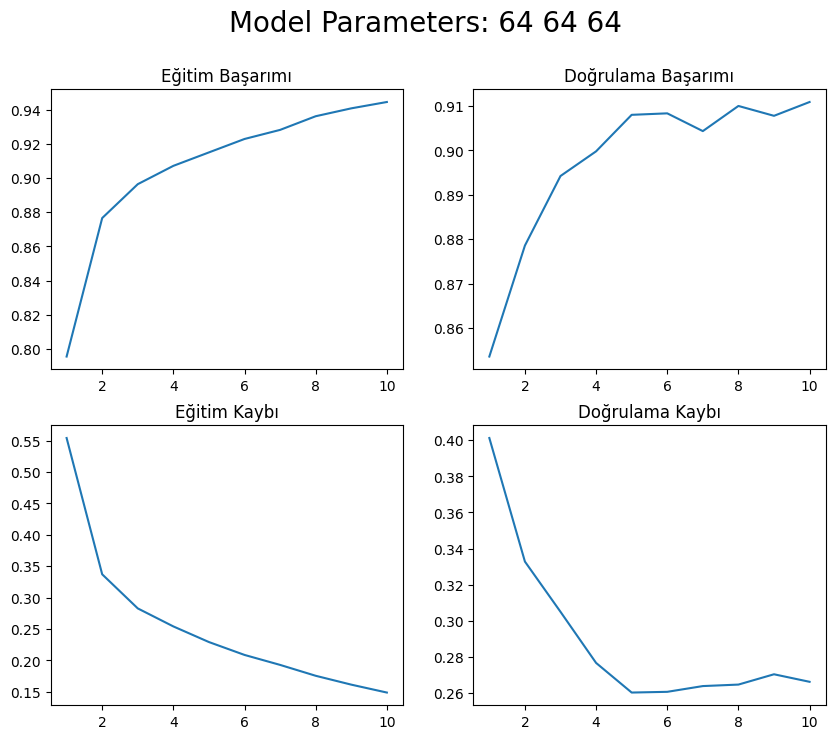

In [ ]:
for (name, history) in histories.items():
  showAccAndLoss(history, name)

In [ ]:
model=myModel(32, 32, 64)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=64,
          validation_split=0.15)

Epoch 1/9
797/797 [==============================] - 42s 51ms/step - loss: 0.6051 - accuracy: 0.7736 - val_loss: 0.4576 - val_accuracy: 0.8291
Epoch 2/9
797/797 [==============================] - 41s 51ms/step - loss: 0.3696 - accuracy: 0.8651 - val_loss: 0.3530 - val_accuracy: 0.8711
Epoch 3/9
797/797 [==============================] - 41s 51ms/step - loss: 0.3124 - accuracy: 0.8863 - val_loss: 0.3020 - val_accuracy: 0.8872
Epoch 4/9
797/797 [==============================] - 43s 54ms/step - loss: 0.2797 - accuracy: 0.8976 - val_loss: 0.2906 - val_accuracy: 0.8931
Epoch 5/9
797/797 [==============================] - 41s 52ms/step - loss: 0.2569 - accuracy: 0.9054 - val_loss: 0.2813 - val_accuracy: 0.8973
Epoch 6/9
797/797 [==============================] - 41s 52ms/step - loss: 0.2365 - accuracy: 0.9121 - val_loss: 0.2730 - val_accuracy: 0.9018
Epoch 7/9
797/797 [==============================] - 42s 52ms/step - loss: 0.2202 - accuracy: 0.9184 - val_loss: 0.2691 - val_accuracy: 0.9059

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2829 - accuracy: 0.9013


In [ ]:
test_predict = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [ ]:
test_predict_output = np.argmax(test_predict, axis = 1)
test_predict_output

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test_output = np.argmax(y_test, axis = 1)
y_test_output

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
f1 = f1_score(y_test_output, test_predict_output, average='weighted')
accuracy = accuracy_score(y_test_output, test_predict_output)

print("F1-Score on test set:", f1)
print("Accuracy on test set:", accuracy)

F1-Score on test set: 0.9017813882789911
Accuracy on test set: 0.9013


In [ ]:
print(classification_report(y_test_output, test_predict_output, target_names=label_names.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.83      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.79      0.89      0.84      1000
       Dress       0.93      0.89      0.91      1000
        Coat       0.87      0.77      0.81      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.77      0.74      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



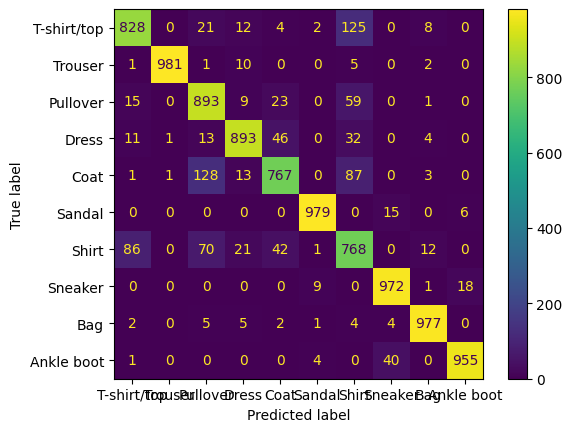

In [ ]:
cm = confusion_matrix(y_test_output, test_predict_output)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names.values())
disp.plot()

# Random Forest ile MNIST FASHION

## Default Model

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
x_train_flatten = x_train.reshape(60000, 784)
x_test_flatten = x_test.reshape(10000, 784)

x_train_flatten = x_train_flatten.astype('float32') /255
x_test_flatten = x_test_flatten.astype('float32') /255

In [ ]:
clf.fit(x_train_flatten, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
test_predict_tree = clf.predict(x_test_flatten)

In [ ]:
f1 = f1_score(y_test, test_predict_tree, average='weighted')
accuracy = accuracy_score(y_test, test_predict_tree)

print("F1-Score on test set:", f1)
print("Accuracy on test set:", accuracy)

F1-Score on test set: 0.8749179690814457
Accuracy on test set: 0.8764


In [ ]:
print(classification_report(y_test, test_predict_tree, target_names=label_names.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.77      0.82      0.79      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.58      0.64      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



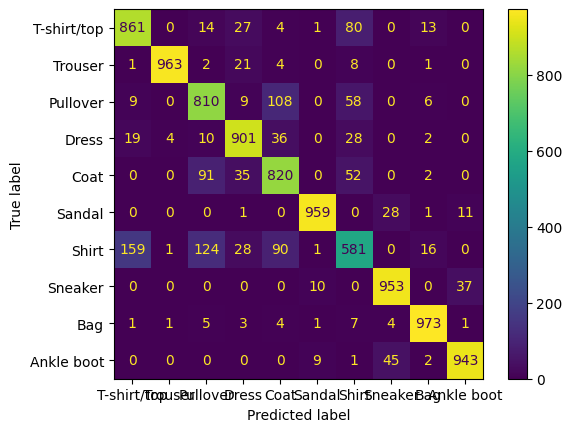

In [ ]:
cm = confusion_matrix(y_test, test_predict_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names.values())
disp.plot()

## Canny Filter Model

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

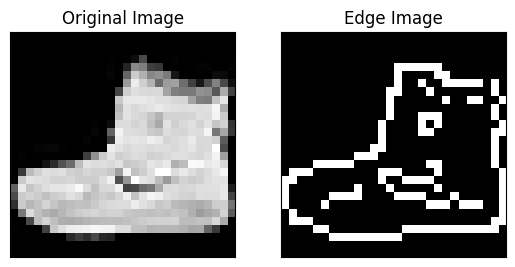

In [ ]:
img = x_train[0]
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [ ]:
x_train_canny = np.zeros((60000, 28, 28))
x_test_canny = np.zeros((10000, 28, 28))

In [ ]:
for i in range(60000):
  x_train_canny[i] = cv.Canny(x_train[i], 100, 200)

for i in range(10000):
  x_test_canny[i] = cv.Canny(x_test[i], 100, 200)

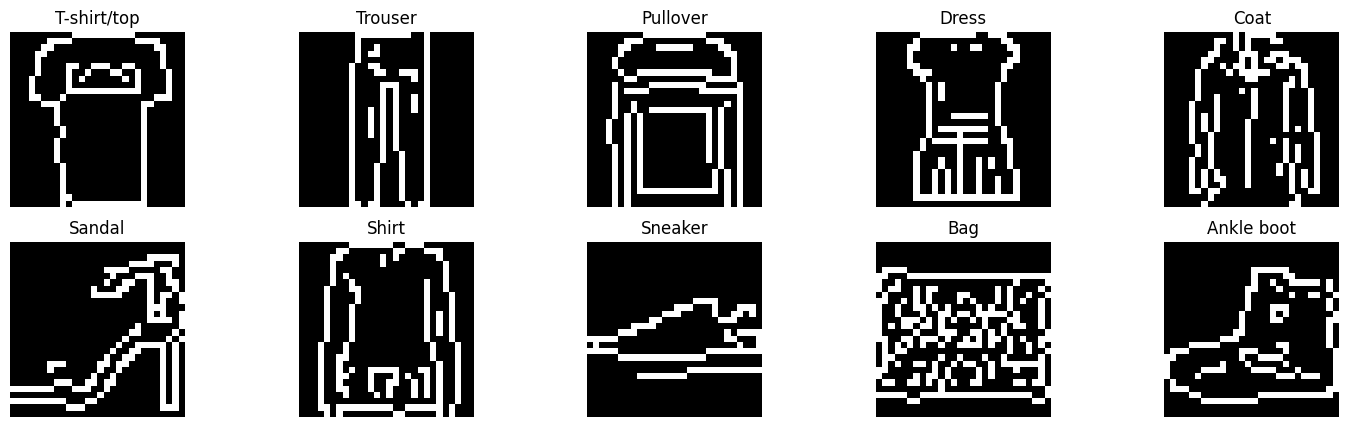

In [ ]:
fig, axs = plt.subplots(2, 5)

fig.set_figheight(5)
fig.set_figwidth(18)

temp_labels = list(range(10))
temp_stack = temp_labels.copy()
index=0

while(temp_stack):
  current_label = y_train[index]

  if current_label in temp_stack:
    axs[temp_labels.index(current_label)//5, temp_labels.index(current_label)%5].imshow(x_train_canny[index], cmap='gray')
    axs[temp_labels.index(current_label)//5, temp_labels.index(current_label)%5].axis('off')
    axs[temp_labels.index(current_label)//5, temp_labels.index(current_label)%5].set_title(label_names[current_label])
    temp_stack.remove(current_label)

  index += 1

In [ ]:
x_train_canny_flatten = x_train_canny.reshape(60000, 784)
x_test_canny_flatten = x_test_canny.reshape(10000, 784)

x_train_canny_flatten = x_train_canny_flatten.astype('float32') /255
x_test_canny_flatten = x_test_canny_flatten.astype('float32') /255

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
clf.fit(x_train_canny_flatten, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
test_predict_tree = clf.predict(x_test_canny_flatten)

In [ ]:
f1 = f1_score(y_test, test_predict_tree, average='weighted')
accuracy = accuracy_score(y_test, test_predict_tree)

print("F1-Score on test set:", f1)
print("Accuracy on test set:", accuracy)

F1-Score on test set: 0.8330446759102433
Accuracy on test set: 0.8355


In [ ]:
print(classification_report(y_test, test_predict_tree, target_names=label_names.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.82      0.81      1000
     Trouser       0.97      0.94      0.96      1000
    Pullover       0.73      0.75      0.74      1000
       Dress       0.81      0.88      0.84      1000
        Coat       0.71      0.79      0.75      1000
      Sandal       0.95      0.88      0.92      1000
       Shirt       0.67      0.50      0.57      1000
     Sneaker       0.88      0.93      0.90      1000
         Bag       0.90      0.93      0.91      1000
  Ankle boot       0.92      0.93      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000



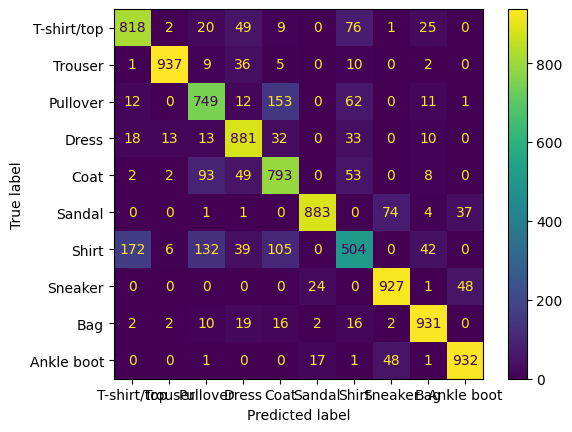

In [ ]:
cm = confusion_matrix(y_test, test_predict_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names.values())
disp.plot()

## Threshold Model

In [ ]:
x_train_clean = np.zeros((60000, 28, 28))
x_test_clean = np.zeros((10000, 28, 28))

binary_threshold = lambda image, threshold_value : image > threshold_value

for i in range(60000):
  x_train_clean[i] = binary_threshold(x_train[i], threshold_otsu(x_train[i]))

for i in range(10000):
  x_test_clean[i] = binary_threshold(x_test[i], threshold_otsu(x_test[i]))

(Text(0.5, 1.0, 'Threshold Image'), ([], []), ([], []))

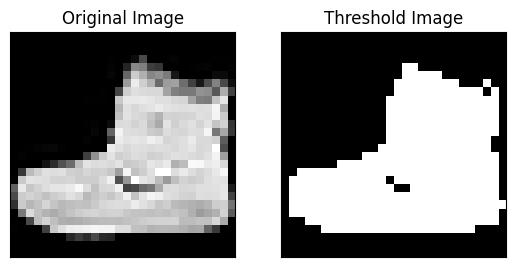

In [ ]:
plt.subplot(121),plt.imshow(x_train[0], cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(x_train_clean[0], cmap='gray')
plt.title('Threshold Image'), plt.xticks([]), plt.yticks([])

In [ ]:
x_train_clean_flatten = x_train_clean.reshape(60000, 784)
x_test_clean_flatten = x_test_clean.reshape(10000, 784)

x_train_clean_flatten = x_train_clean_flatten.astype('float32') /255
x_test_clean_flatten = x_test_clean_flatten.astype('float32') /255

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
clf.fit(x_train_clean_flatten, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
test_predict_tree = clf.predict(x_test_clean_flatten)

In [ ]:
f1 = f1_score(y_test, test_predict_tree, average='weighted')
accuracy = accuracy_score(y_test, test_predict_tree)

print("F1-Score on test set:", f1)
print("Accuracy on test set:", accuracy)

F1-Score on test set: 0.8609288980833497
Accuracy on test set: 0.8623


In [ ]:
print(classification_report(y_test, test_predict_tree, target_names=label_names.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.84      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.76      0.78      0.77      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.75      0.80      0.77      1000
      Sandal       0.93      0.94      0.93      1000
       Shirt       0.70      0.59      0.64      1000
     Sneaker       0.91      0.93      0.92      1000
         Bag       0.94      0.95      0.95      1000
  Ankle boot       0.95      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



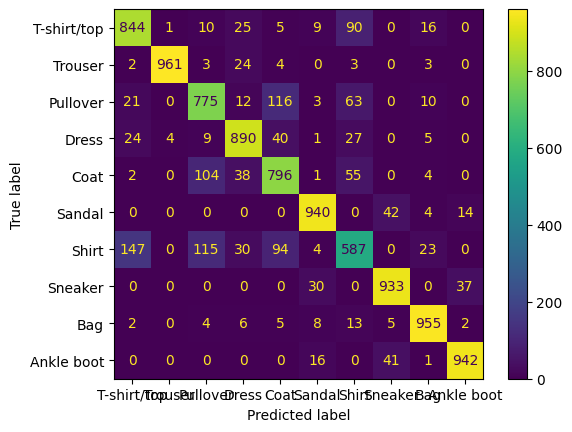

In [ ]:
cm = confusion_matrix(y_test, test_predict_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names.values())
disp.plot()